In [1]:
#import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import numpy as np

In [2]:
#Read Data

full_df = pd.read_csv("../../MVP/Data/full_df.csv")

index_df = full_df[full_df['category'] == 'Index']
index_df['dates'] = index_df['dates'].astype('datetime64[ns]')

dji_df = index_df.loc[index_df['stock'] == 'DJI']
inx_df = index_df.loc[index_df['stock'] == 'INX']
ndaq_df = index_df.loc[index_df['stock'] == 'NDAQ']

carz_df = full_df.loc[full_df['stock'] == 'CARZ']
carz_df['dates'] = carz_df['dates'].astype('datetime64[ns]')

ftxg_df = full_df.loc[full_df['stock'] == 'FTXG']
ftxg_df['dates'] = ftxg_df['dates'].astype('datetime64[ns]')

iyz_df = full_df.loc[full_df['stock'] == 'IYZ']
iyz_df['dates'] = iyz_df['dates'].astype('datetime64[ns]')

pdbc_df = full_df.loc[full_df['stock'] == 'PDBC']
pdbc_df['dates'] = pdbc_df['dates'].astype('datetime64[ns]')

xrt_df = full_df.loc[full_df['stock'] == 'XRT']
xrt_df['dates'] = xrt_df['dates'].astype('datetime64[ns]')


/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats i

In [3]:
#create percentage column
def close_pct(df):
    df['close_pct'] = round(100 * (df['close'] / int(df.loc[df['dates'] =='2020-01-28']['close'].values)),2)
    return df

dji_df = close_pct(dji_df)
ndaq_df = close_pct(ndaq_df)
inx_df = close_pct(inx_df)
carz_df = close_pct(carz_df)
ftxg_df = close_pct(ftxg_df)
xrt_df = close_pct(xrt_df)
iyz_df = close_pct(iyz_df)
pdbc_df = close_pct(pdbc_df)

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [4]:
#plot function
def plot_data(ind_avg, stonk, avg_title, stonk_title):
    
    #sort ind avg dates
    ind_avg = ind_avg.sort_values('dates', ascending=True)
    
    #filter to crash only
    ind_avg_crash = (ind_avg['dates'] >= '2020-01-28')
    ind_avg_crash_df = ind_avg.loc[ind_avg_crash]
    
    #sort stock dates
    stonk = stonk.sort_values('dates', ascending=True)
    
    #filter to crash only
    stonk_crash = (stonk['dates'] >= '2020-01-28')
    stonk_crash_df = stonk.loc[stonk_crash]

    #plot
    fig = plt.figure(figsize=(20,10))
    
    ax = fig.add_subplot(211)
    ind_avg_crash_df.plot(y='close_pct', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Percent')
    plt.title(avg_title)
    plt.grid()
    plt.yticks(np.arange(50,110,step=5))

    
    x_avg = mdates.date2num(ind_avg_crash_df['dates'].tolist())
    y_avg = ind_avg_crash_df['close_pct'].tolist()
    z_avg = np.polyfit(x_avg, y_avg, 12)
    p_avg = np.poly1d(z_avg)
    plt.plot(x_avg, p_avg(x_avg), 'r--')
    
    ax = fig.add_subplot(212)
    stonk_crash_df.plot(y='close_pct', x='dates', kind='line', ax=ax, legend=False)
    plt.xlabel('Date')
    plt.ylabel('Close Percent')
    plt.title(stonk_title)
    plt.grid()
    plt.yticks(50,60,70,80,90,100,110)
    
    x_stonk = mdates.date2num(stonk_crash_df['dates'].tolist())
    y_stonk = stonk_crash_df['close_pct'].tolist()
    z_stonk = np.polyfit(x_stonk, y_stonk, 12)
    p_stonk = np.poly1d(z_stonk)
    plt.plot(x_stonk, p_stonk(x_stonk), 'r--')
    
    ind_avg_name = "".join(ind_avg.stock.unique())
    stonk_name = "".join(stonk.stock.unique())
    
    plt.tight_layout()
    plt.show()
    plt.savefig('plots/' + ind_avg_name + '_' + stonk_name + '.png')
    
    return ax

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


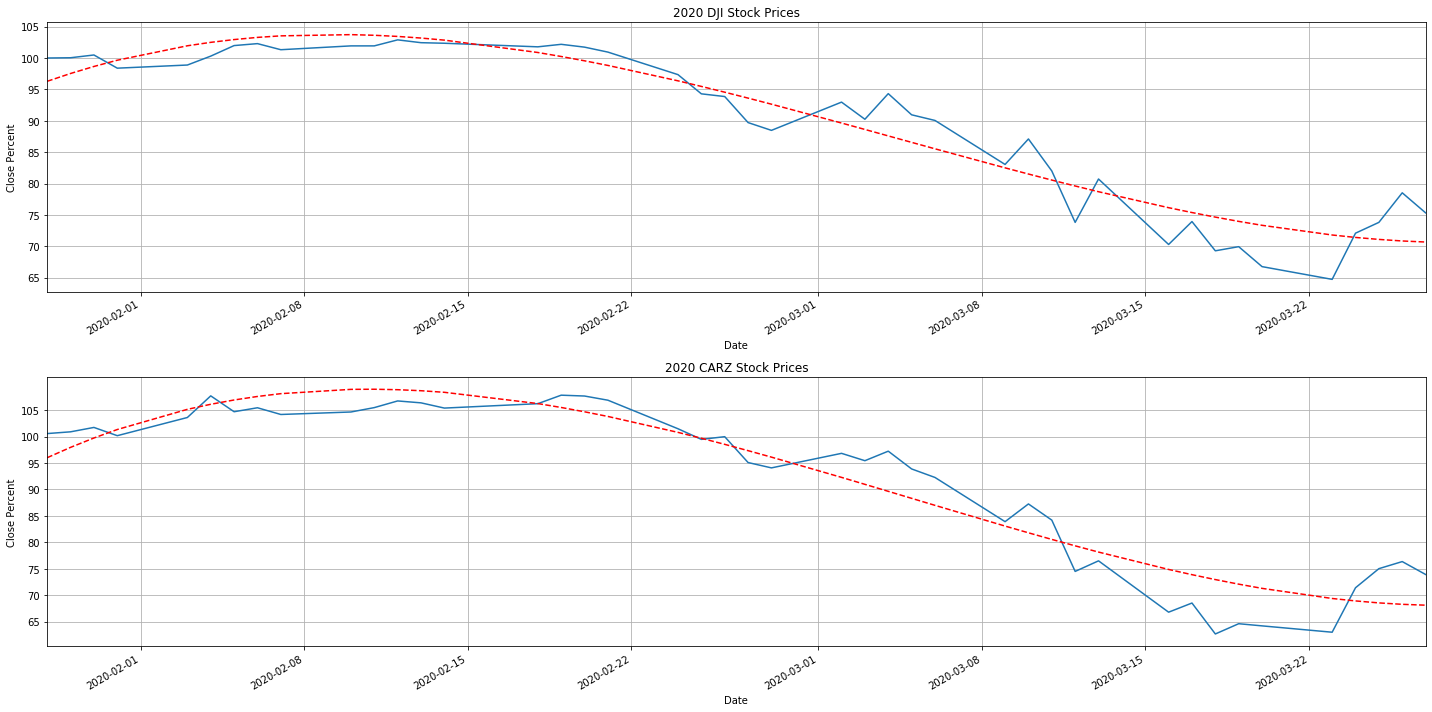

<Figure size 432x288 with 0 Axes>

In [5]:
CARZ_DJI_chart = plot_data(dji_df, carz_df, '2020 DJI Stock Prices', '2020 CARZ Stock Prices')
#CARZ_DJI_chart.savefig('DJI/CARZ_DJI_chart.png')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


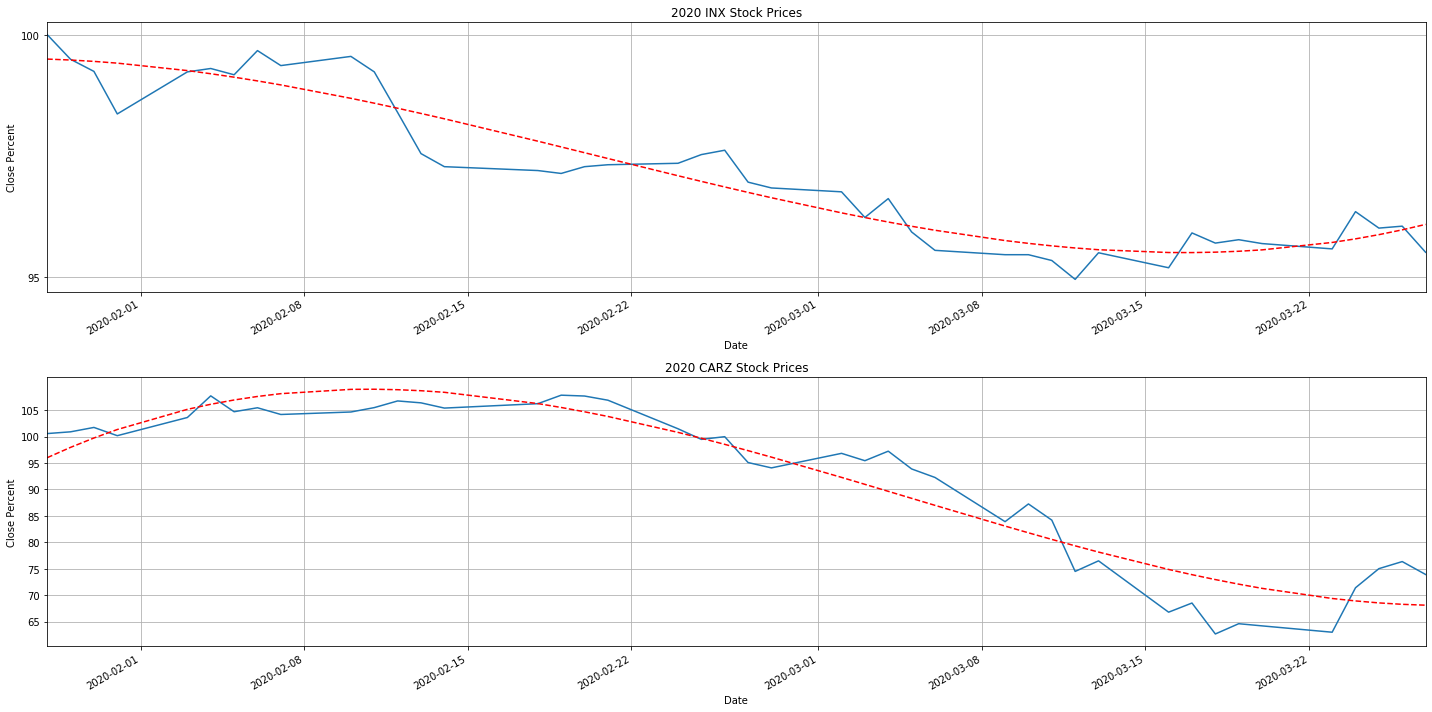

<Figure size 432x288 with 0 Axes>

In [6]:
CARZ_INX_chart = plot_data(inx_df, carz_df, '2020 INX Stock Prices', '2020 CARZ Stock Prices')
plt.savefig('INX/CARZ_INX_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


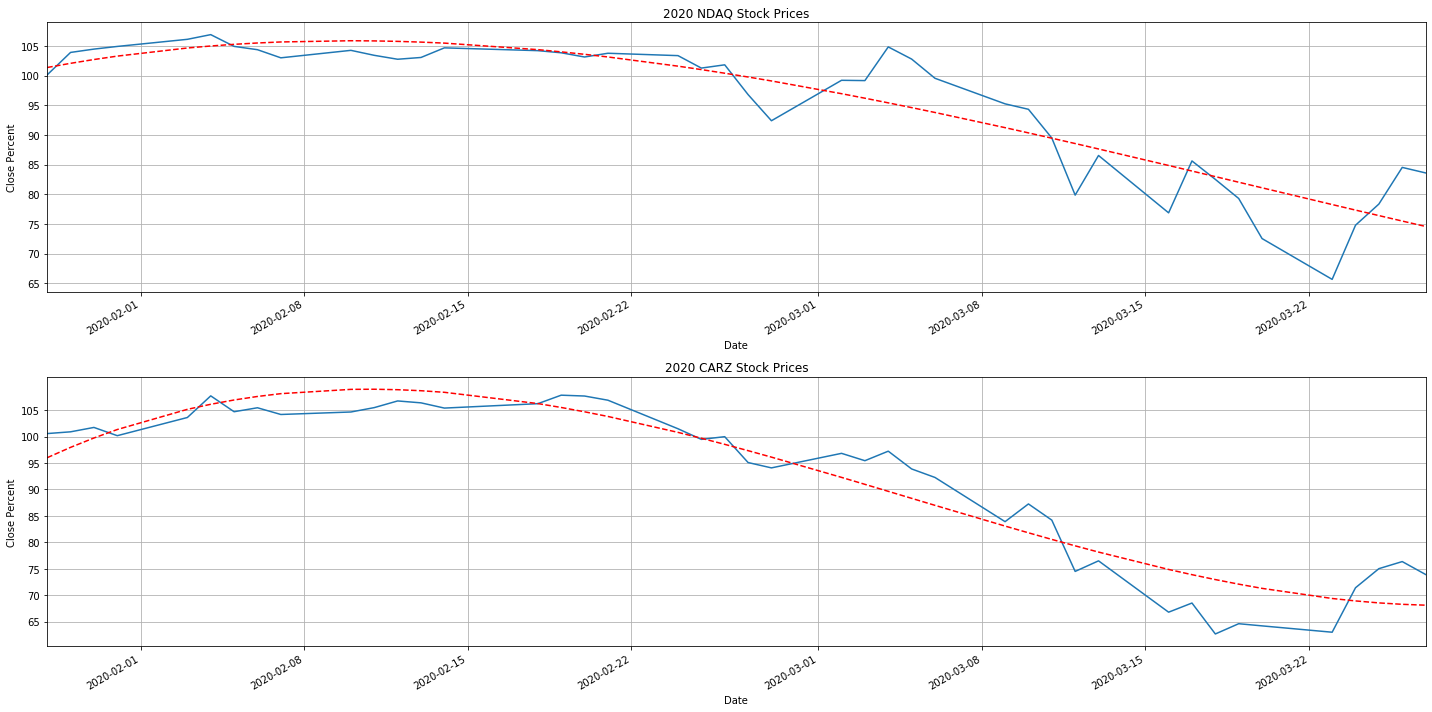

<Figure size 432x288 with 0 Axes>

In [7]:
CARZ_NDAQ_chart = plot_data(ndaq_df, carz_df, '2020 NDAQ Stock Prices', '2020 CARZ Stock Prices')
plt.savefig('NDAQ/CARZ_NDAQ_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


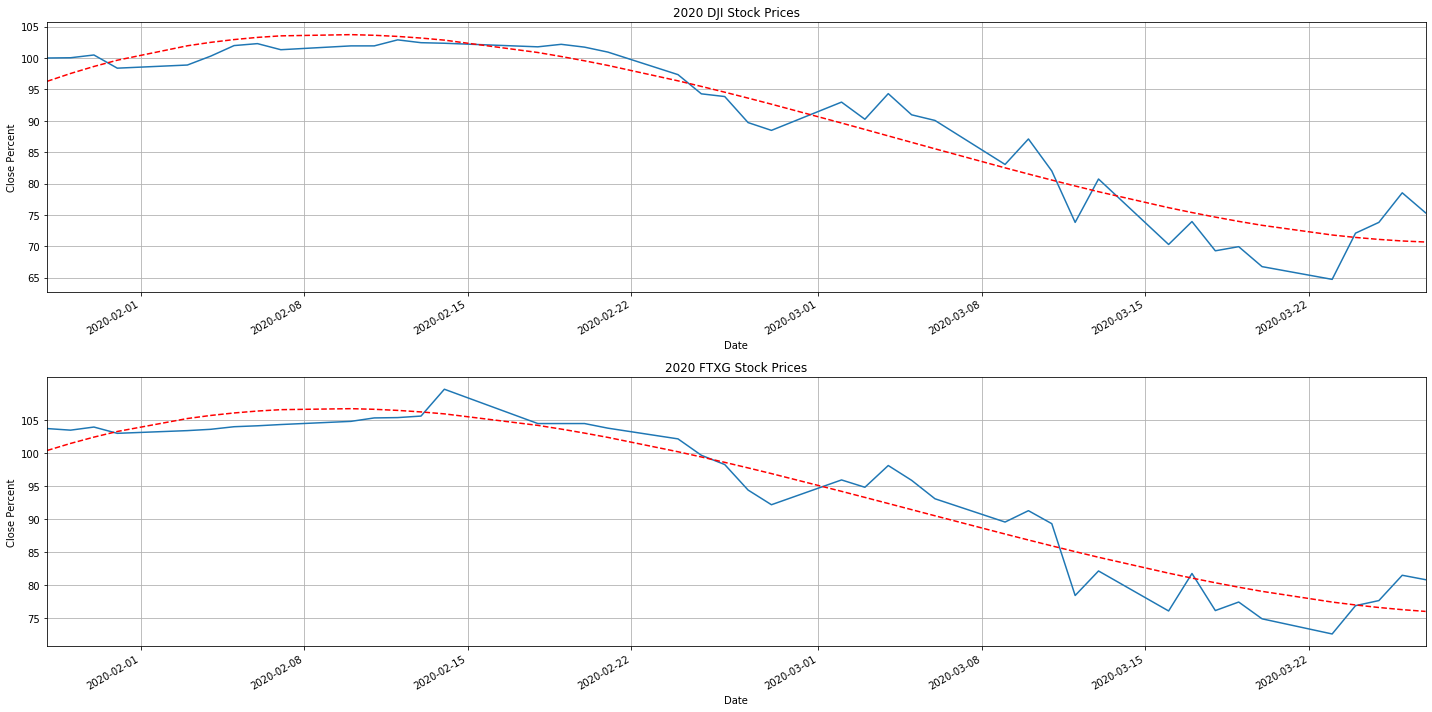

<Figure size 432x288 with 0 Axes>

In [8]:
FTXG_DJI_chart = plot_data(dji_df, ftxg_df, '2020 DJI Stock Prices', '2020 FTXG Stock Prices')
plt.savefig('DJI/FTXG_DJI_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


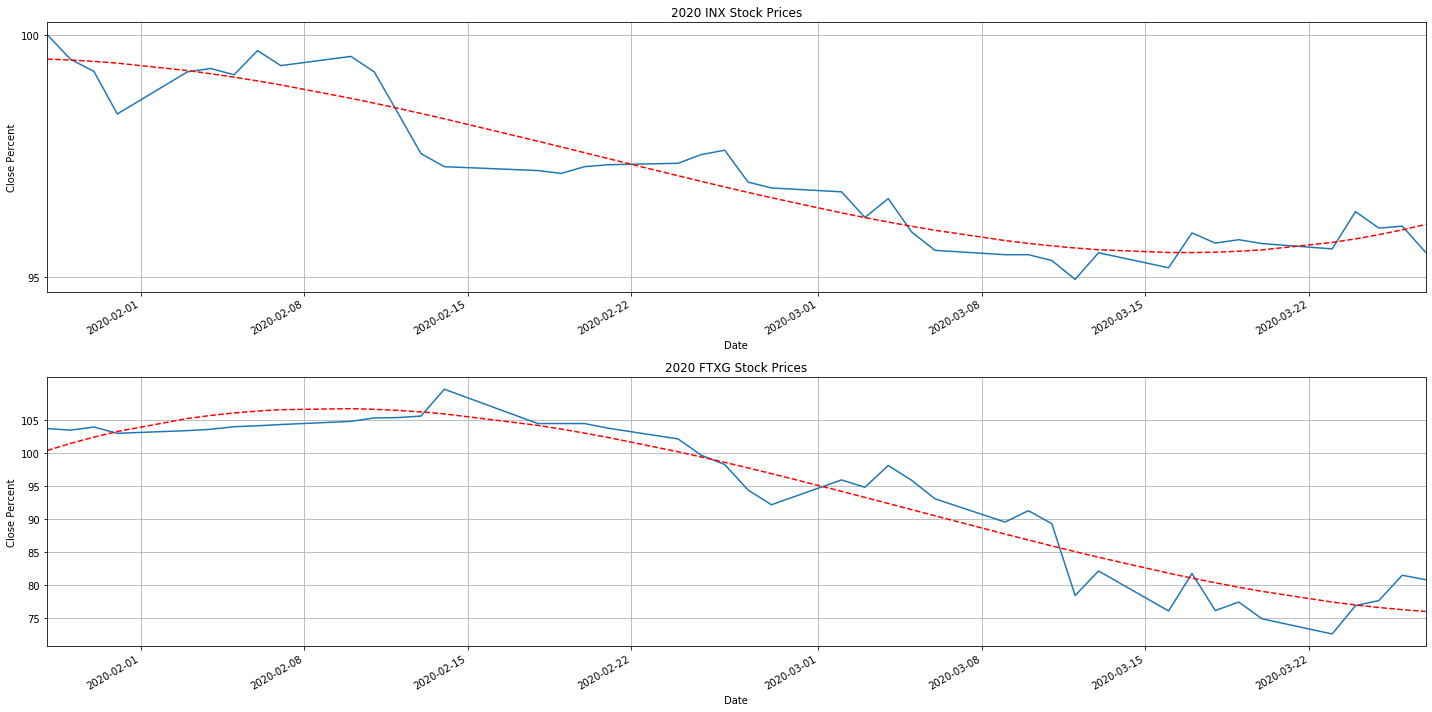

<Figure size 432x288 with 0 Axes>

In [9]:
FTXG_INX_chart = plot_data(inx_df, ftxg_df, '2020 INX Stock Prices', '2020 FTXG Stock Prices')
plt.savefig('INX/FTXG_INX_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


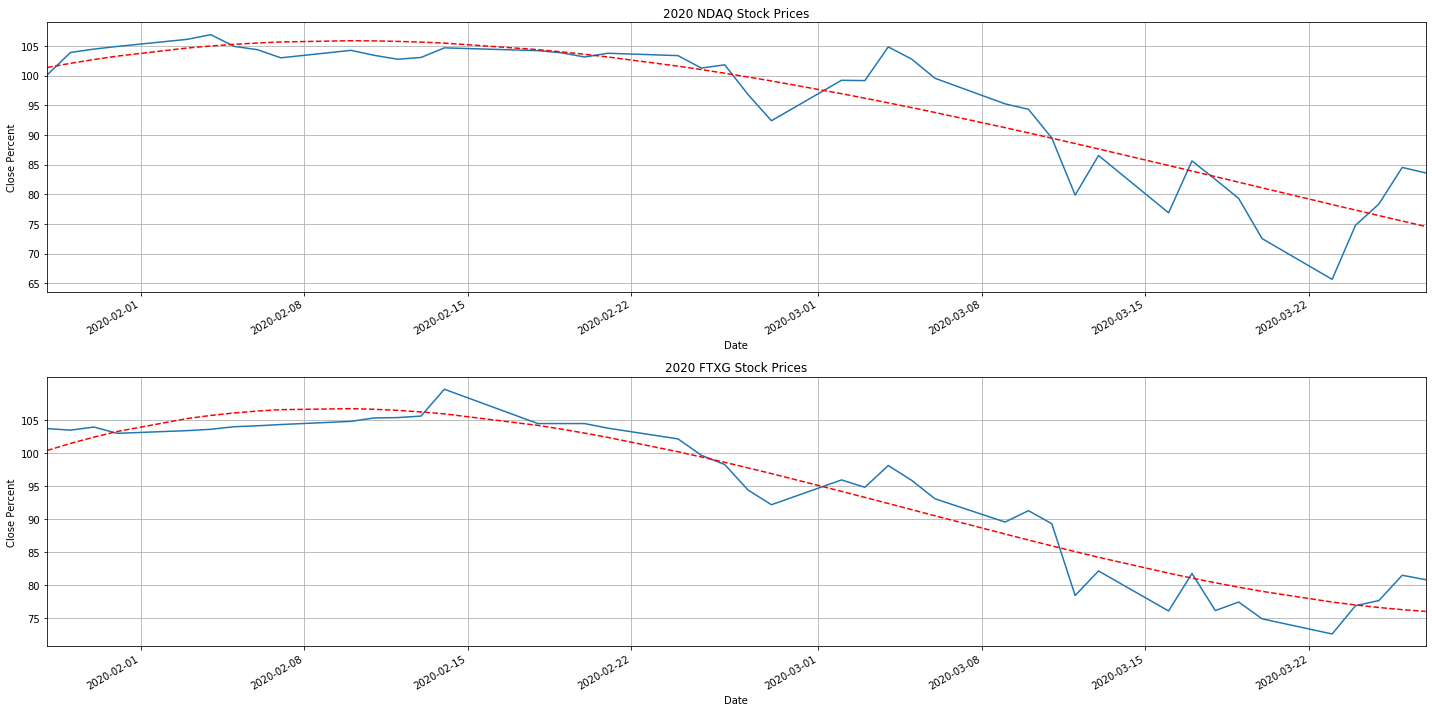

<Figure size 432x288 with 0 Axes>

In [10]:
FTXG_NDAQ_chart = plot_data(ndaq_df, ftxg_df, '2020 NDAQ Stock Prices', '2020 FTXG Stock Prices')
plt.savefig('NDAQ/FTXG_NDAQ_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


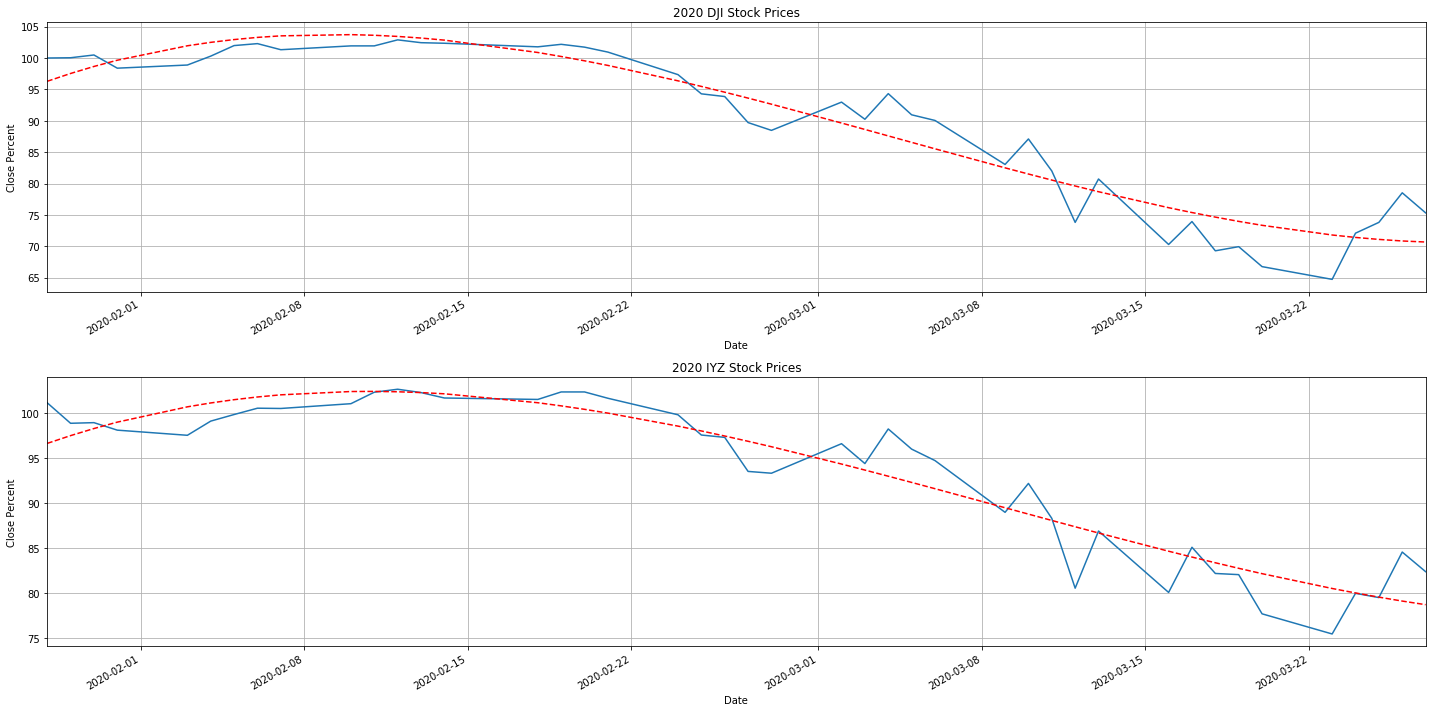

<Figure size 432x288 with 0 Axes>

In [11]:
IYZ_DJI_chart = plot_data(dji_df, iyz_df, '2020 DJI Stock Prices', '2020 IYZ Stock Prices')
plt.savefig('DJI/IYZ_DJI_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


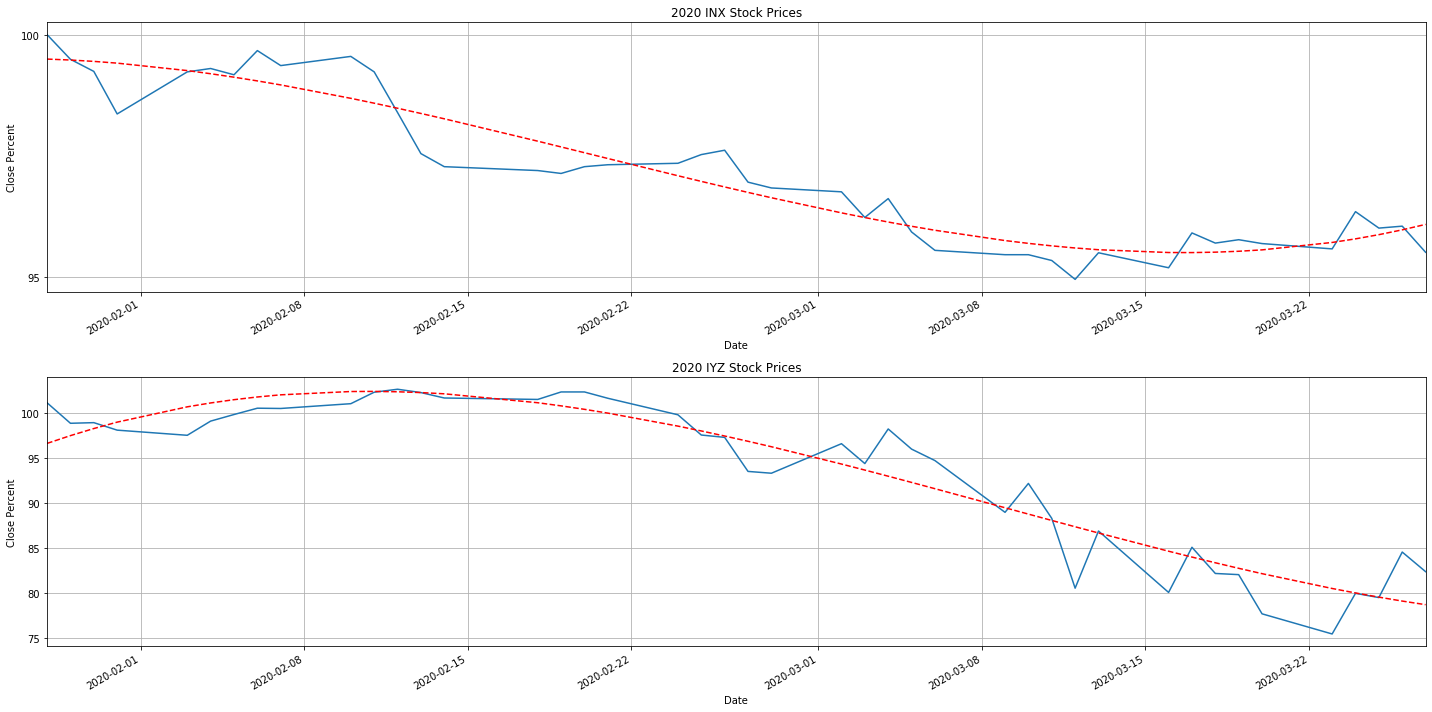

<Figure size 432x288 with 0 Axes>

In [12]:
IYZ_INX_chart = plot_data(inx_df, iyz_df, '2020 INX Stock Prices', '2020 IYZ Stock Prices')
plt.savefig('INX/IYZ_INX_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


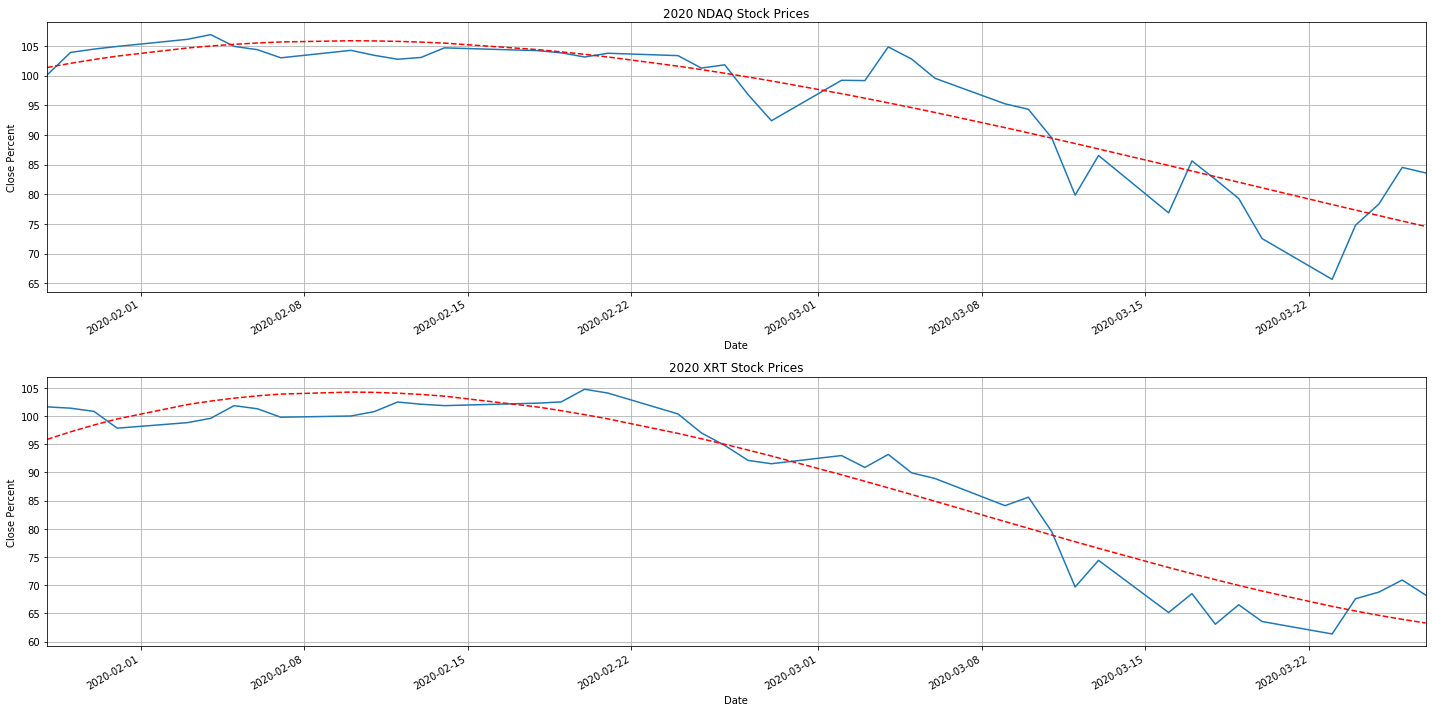

<Figure size 432x288 with 0 Axes>

In [13]:
XRT_NDAQ_chart = plot_data(ndaq_df, xrt_df, '2020 NDAQ Stock Prices', '2020 XRT Stock Prices')
plt.savefig('NDAQ/IYZ_NDAQ_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


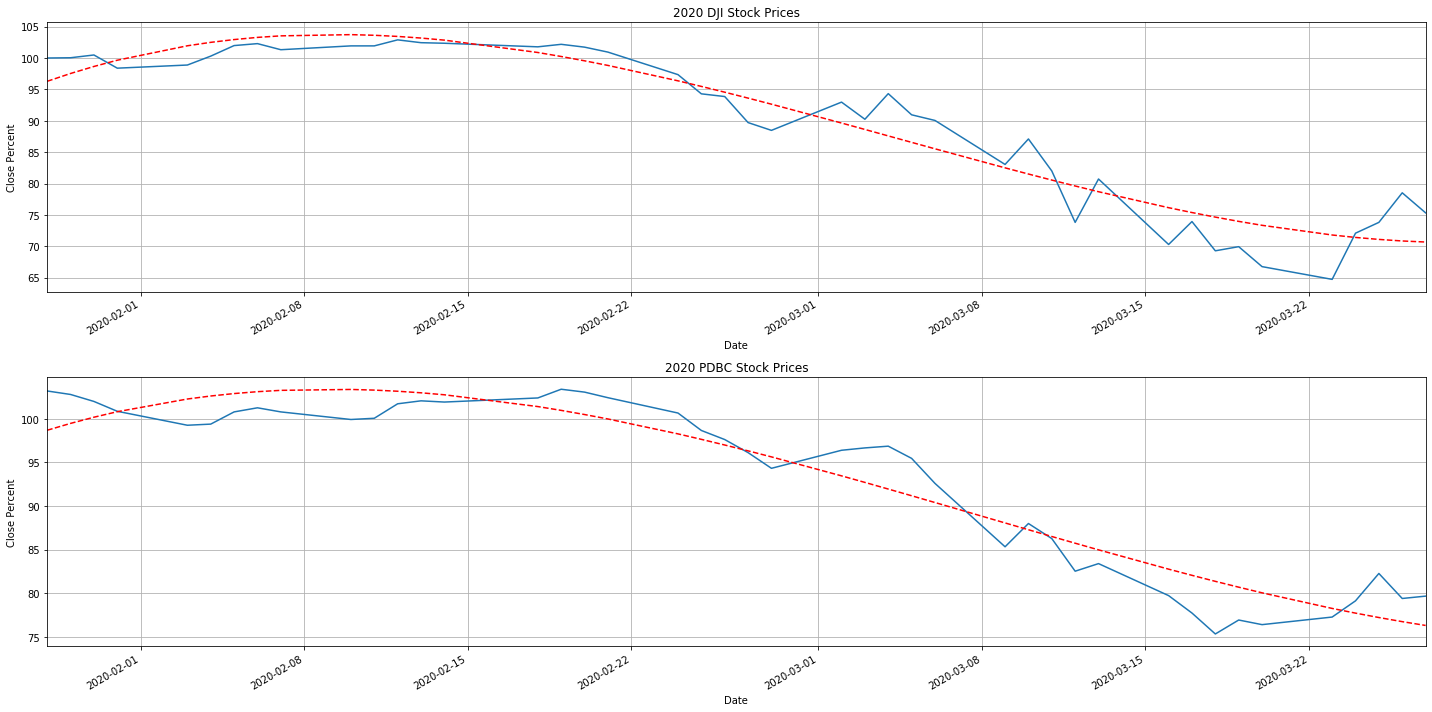

<Figure size 432x288 with 0 Axes>

In [14]:
PDBC_DJI_chart = plot_data(dji_df, pdbc_df, '2020 DJI Stock Prices', '2020 PDBC Stock Prices')
plt.savefig('DJI/PDBC_DJI_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


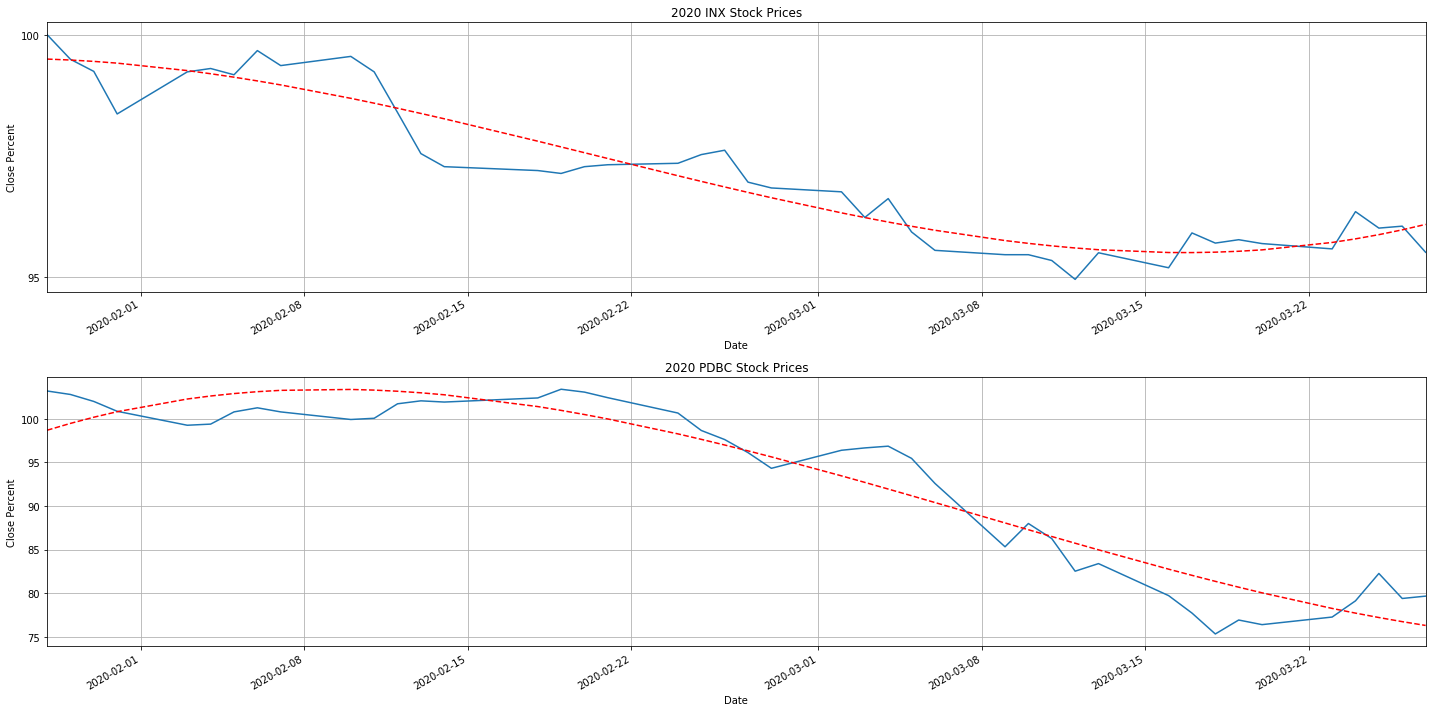

<Figure size 432x288 with 0 Axes>

In [15]:
PDBC_INX_chart = plot_data(inx_df, pdbc_df, '2020 INX Stock Prices', '2020 PDBC Stock Prices')
plt.savefig('INX/PDBC_INX_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


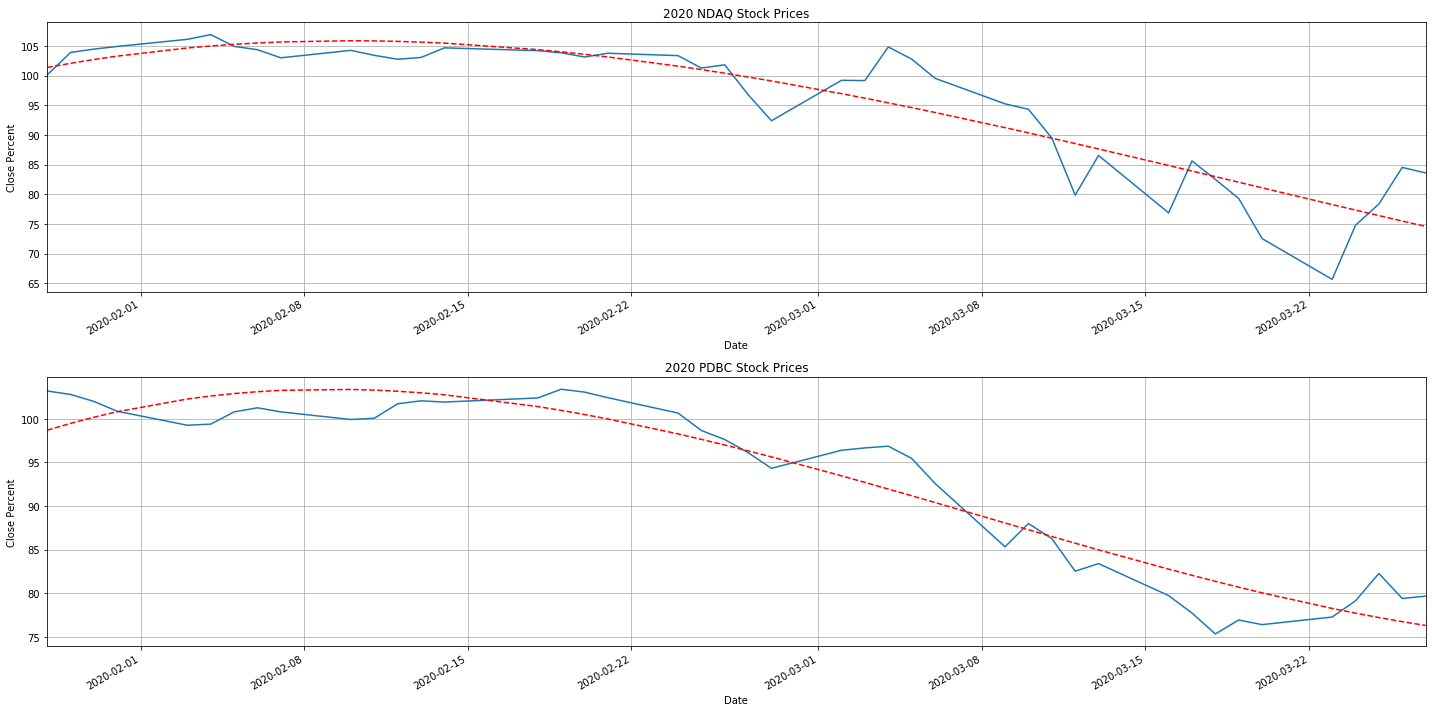

<Figure size 432x288 with 0 Axes>

In [16]:
PDBC_NDAQ_chart = plot_data(ndaq_df, pdbc_df, '2020 NDAQ Stock Prices', '2020 PDBC Stock Prices')
plt.savefig('NDAQ/PDBC_NDAQ_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


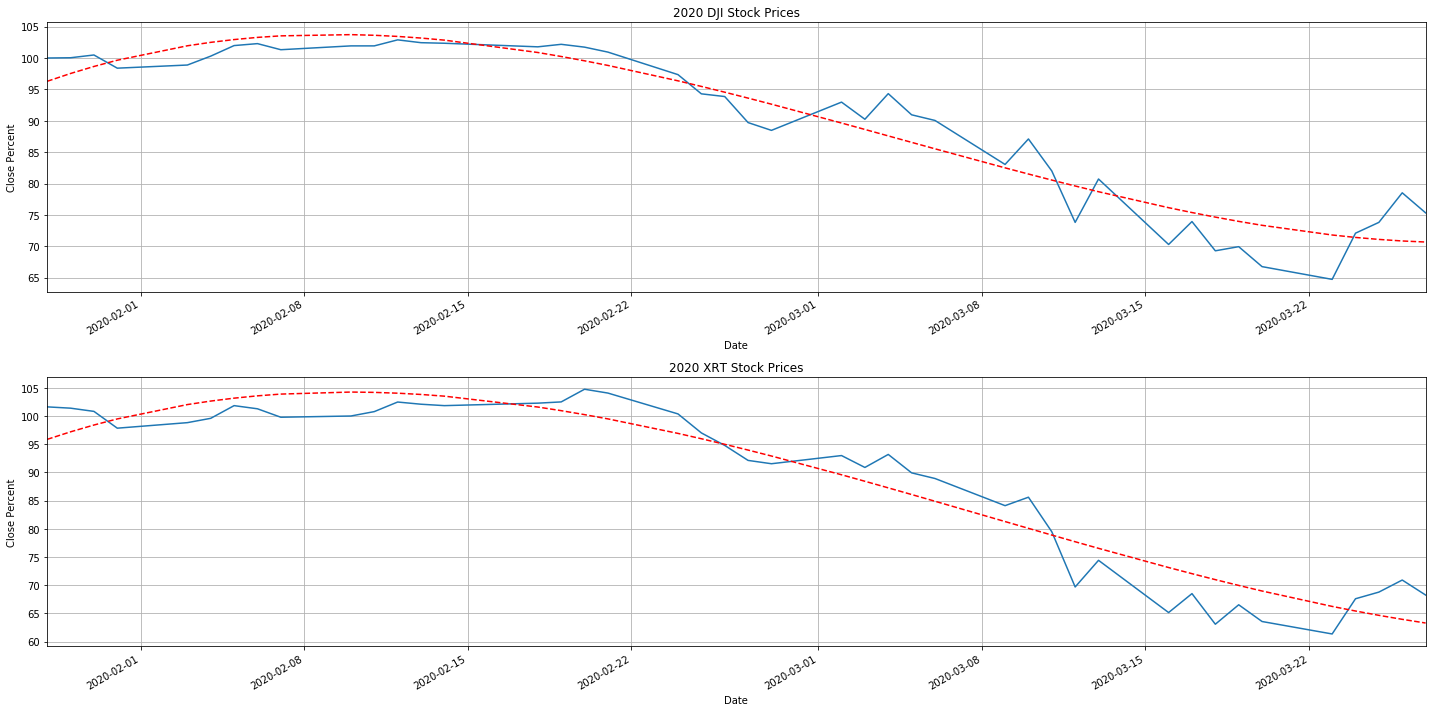

<Figure size 432x288 with 0 Axes>

In [17]:
XRT_DJI_chart = plot_data(dji_df, xrt_df, '2020 DJI Stock Prices', '2020 XRT Stock Prices')
plt.savefig('DJI/XRT_DJI_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


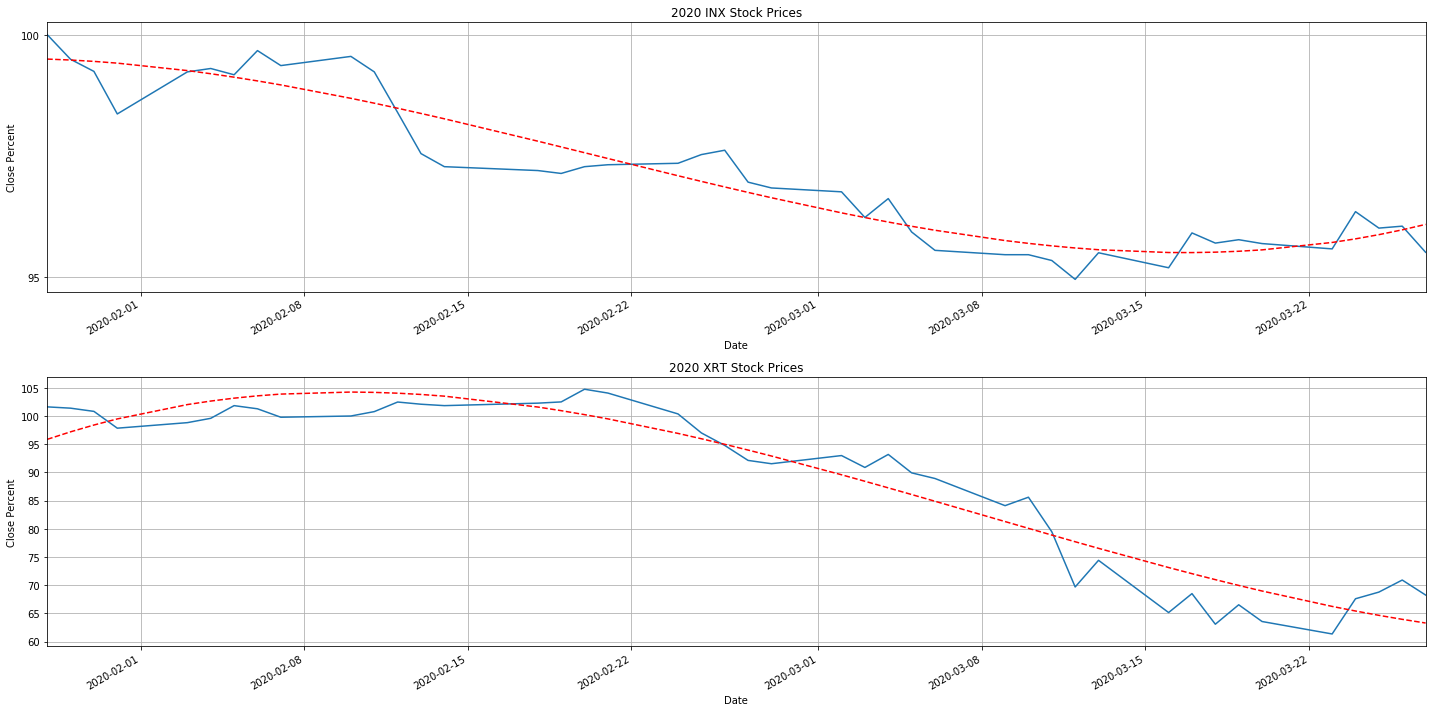

<Figure size 432x288 with 0 Axes>

In [18]:
XRT_INX_chart = plot_data(inx_df, xrt_df, '2020 INX Stock Prices', '2020 XRT Stock Prices')
plt.savefig('INX/XRT_INX_chart.svg')

/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.
/Users/salr/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: RankWarning: Polyfit may be poorly conditioned
  """Entry point for launching an IPython kernel.


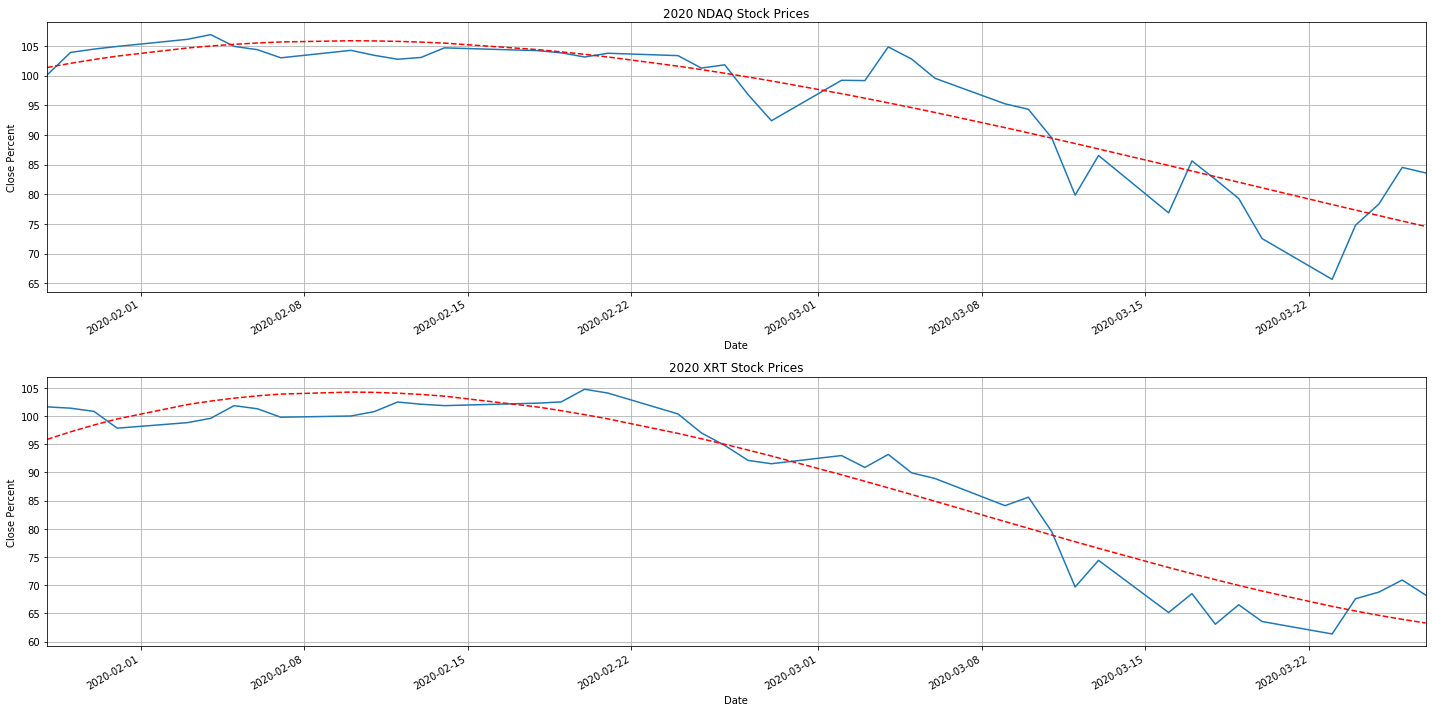

<Figure size 432x288 with 0 Axes>

In [19]:
XRT_NDAQ_chart = plot_data(ndaq_df, xrt_df, '2020 NDAQ Stock Prices', '2020 XRT Stock Prices')
plt.savefig('NDAQ/XRT_NDAQ_chart.png')